# Reducing Dimensionality

## Understanding SVD

### Considering the problem of dimensionality reduction

### Using SVD to measure the invisible

In [573]:
import numpy as np
A = np.array([[1, 3, 4], [2, 3, 5], [1, 2, 3], [5, 4, 6]])
print(A)

[[1 3 4]
 [2 3 5]
 [1 2 3]
 [5 4 6]]


In [574]:
U, s, Vh = np.linalg.svd(A, full_matrices=False)
print np.shape(U), np.shape(s),np.shape(Vh)
print s

[ 12.26362747   2.11085464   0.38436189]
(4L, 3L) (3L,) (3L, 3L)


In [575]:
print np.dot(np.dot(U, np.diag(s)), Vh) # Full matrix reconstruction

[[ 1.  3.  4.]
 [ 2.  3.  5.]
 [ 1.  2.  3.]
 [ 5.  4.  6.]]


In [576]:
print np.round(np.dot(np.dot(U[:,:2], np.diag(s[:2])), Vh[:2,:]),1) # k=2 reconstruction

[[ 1.   2.8  4.1]
 [ 2.   3.2  4.8]
 [ 1.   2.   3. ]
 [ 5.   3.9  6. ]]


In [577]:
print np.round(np.dot(np.dot(U[:,:1], np.diag(s[:1])), Vh[:1,:]),1) # k=1 reconstruction

[[ 2.1  2.5  3.7]
 [ 2.6  3.1  4.6]
 [ 1.6  1.8  2.8]
 [ 3.7  4.3  6.5]]


In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=5, random_state=42)
svd.fit(X) 
print(svd.explained_variance_ratio_) 
print(svd.explained_variance_ratio_.sum())
shape(svd.components_)

[ 0.07825405  0.05528833  0.05445136  0.049973    0.04134283]
0.279309572028


## Performing Factor Analysis

### Considering the psychometric model

### Looking for hidden factors

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X = iris.data
Y = iris.target
factor = FactorAnalysis(n_components=4).fit(X)

In [567]:
import pandas as pd
print pd.DataFrame(factor.components_,columns=iris.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.707227         -0.153147           1.653151          0.701569
1           0.114676          0.159763          -0.045604         -0.014052
2           0.000000         -0.000000          -0.000000         -0.000000
3          -0.000000          0.000000           0.000000         -0.000000

[4 rows x 4 columns]


## Executing Principal Component Analysis

### Using components, not factors

### Achieving dimensionality reduction

In [570]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X)
print 'Explained variance by each component: %s' % pca.explained_variance_ratio_
print pd.DataFrame(pca.components_,columns=iris.feature_names)

Explained variance by each component: [ 0.92461621  0.05301557  0.01718514  0.00518309]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361590         -0.082269           0.856572          0.358844
1          -0.656540         -0.729712           0.175767          0.074706
2           0.580997         -0.596418          -0.072524         -0.549061
3           0.317255         -0.324094          -0.479719          0.751121

[4 rows x 4 columns]


## Understanding some applications

### Recognizing faces with PCA

The dataset contains 400 images of 40 different persons. The photos were taken
with different light conditions and facial expressions (including open/closed eyes,
smiling/not smiling, and with glasses/no glasses). For additional information about
the dataset refer to http://www.cl.cam.ac.uk/research/dtg/attarchive/
facedatabase.html.
Looking at the content of the faces object, we get the following properties: images,
data, and target. Images contain the 400 images represented as 64 x 64 pixel
matrices. data contains the same 400 images but as array of 4096 pixels. target is, as
expected, an array with the target classes, ranging from 0 to 39.

In [16]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)
train_faces = dataset.data[:350,:]
test_faces  = dataset.data[350:,:]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

print dataset.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [17]:
from sklearn.decomposition import RandomizedPCA
n_components = 25
Rpca = RandomizedPCA(n_components=n_components, whiten=True).fit(train_faces)
print 'Explained variance by %i components: %0.3f' % (n_components, np.sum(Rpca.explained_variance_ratio_))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces  = Rpca.transform(test_faces)

Explained variance by 25 components: 0.794


We are looking for face id=34


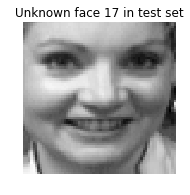

In [18]:
import matplotlib.pyplot as plt
photo = 17
print 'We are looking for face id=%i' % test_answers[photo]
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

In [19]:
mask = compressed_test_faces[photo,] #Just the vector of value components of our photo
squared_errors = np.sum((compressed_train_faces - mask)**2,axis=1)
minimum_error_face = argmin(squared_errors)
most_resembling = list(np.where(squared_errors < 20)[0])
print 'Best resembling face in train test: %i' % train_answers[minimum_error_face]

Best resembling face in train test: 34


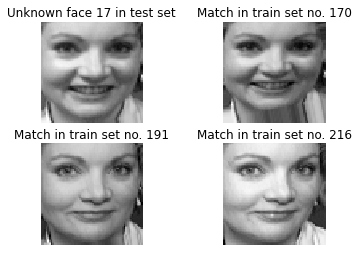

In [20]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
for k,m in enumerate(most_resembling[:3]):
    plt.subplot(2, 2, 2+k)
    plt.title('Match in train set no. '+str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

### Positive Matrix factorization

In [2]:
import os
print os.getcwd()

C:\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\Scripts


In [1]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, categories = ['misc.forsale'], remove=('headers', 'footers', 'quotes'), random_state=101)
print 'Posts: %i' % len(dataset.data)

Posts: 585


In [2]:
print dataset.target_names

['misc.forsale']


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data)

In [4]:
from sklearn.decomposition import NMF
n_topics = 5
nmf = NMF(n_components=n_topics, random_state=101).fit(tfidf)

In [5]:
feature_names = vectorizer.get_feature_names()
n_top_words = 15
for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % (topic_idx+1),
    print " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

Topic #1: drive hard card floppy monitor meg ram disk motherboard vga scsi brand color internal modem
Topic #2: 00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
Topic #3: condition excellent offer asking best car old sale good new miles 10 000 tape cd
Topic #4: shipping vcr stereo works obo included amp plus great volume vhs unc mathes gibbs radley
Topic #5: email looking games game mail interested send like thanks price package list sale want know


In [24]:
nmf = NMF(n_components=n_topics+100, random_state=101).fit(tfidf)
nmf.reconstruction_err_

19.081869391859613

### Movie Recommendation Engine

In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip'])
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'])
MovieLens = pd.merge(pd.merge(ratings, users), movies)

/Users/Kavi/anaconda/envs/Platinum/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


FileNotFoundError: [Errno 2] No such file or directory: 'ml-1m/users.dat'

In [5]:
ratings_mtx_df = MovieLens.pivot_table(values='rating', rows='user_id', cols='title', fill_value=0)
movie_index = ratings_mtx_df.columns

In [6]:
from sklearn.decomposition import TruncatedSVD
recom = TruncatedSVD(n_components=10, random_state=101)
R = recom.fit_transform(ratings_mtx_df.values.T)

In [7]:
# 1196::Star Wars: Episode V - The Empire Strikes Back (1980)::Action|Adventure|Drama|Sci-Fi|War
star_wars_idx = list(movie_index).index('Star Wars: Episode V - The Empire Strikes Back (1980)')
print R[star_wars_idx]

[ 184.72254552  -17.7761415    47.33483561  -51.46669814  -47.9152707
  -17.65000951  -14.34294204  -12.88678007  -17.48586358   -5.38370224]


In [9]:
import numpy as np
correlation_matrix = np.corrcoef(R)
P = correlation_matrix[star_wars_idx]
print list(movie_index[(P > 0.98) & (P < 1.0)])

['Raiders of the Lost Ark (1981)', 'Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VI - Return of the Jedi (1983)']


In [10]:
star_wars_idx

3154